In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
excel_name = "data/voivodships_pop_by_age_sex.xls"
sheet_list = pd.ExcelFile(excel_name).sheet_names
df_dict = {sheet:pd.read_excel(excel_name, sheet_name=sheet)
    for sheet in sheet_list}

In [3]:
from copy import deepcopy

df_dict_copy = deepcopy(df_dict)
lost_row = [df_dict_copy[sheet].iloc[110, 1:4].to_list()
            for sheet in sheet_list]
del df_dict_copy

In [4]:
full_list = list(range(0,102))
del full_list[5:102:6]


for i, voivodship in enumerate(df_dict):
    df_dict[voivodship] = df_dict[voivodship].iloc[9:114, 1:4]
    df_dict[voivodship] = df_dict[voivodship].iloc[full_list]
    df_dict[voivodship].reset_index(drop=True, inplace = True)
    df_dict[voivodship].columns = ["total","males","females"]
    df_dict[voivodship].loc[len(df_dict[voivodship])] = lost_row[i]

In [5]:


df_males = pd.DataFrame({voivodship.upper(): df_dict[voivodship]["males"]
                            for voivodship in df_dict})
df_females = pd.DataFrame({voivodship.upper(): df_dict[voivodship]["females"]
                            for voivodship in df_dict})

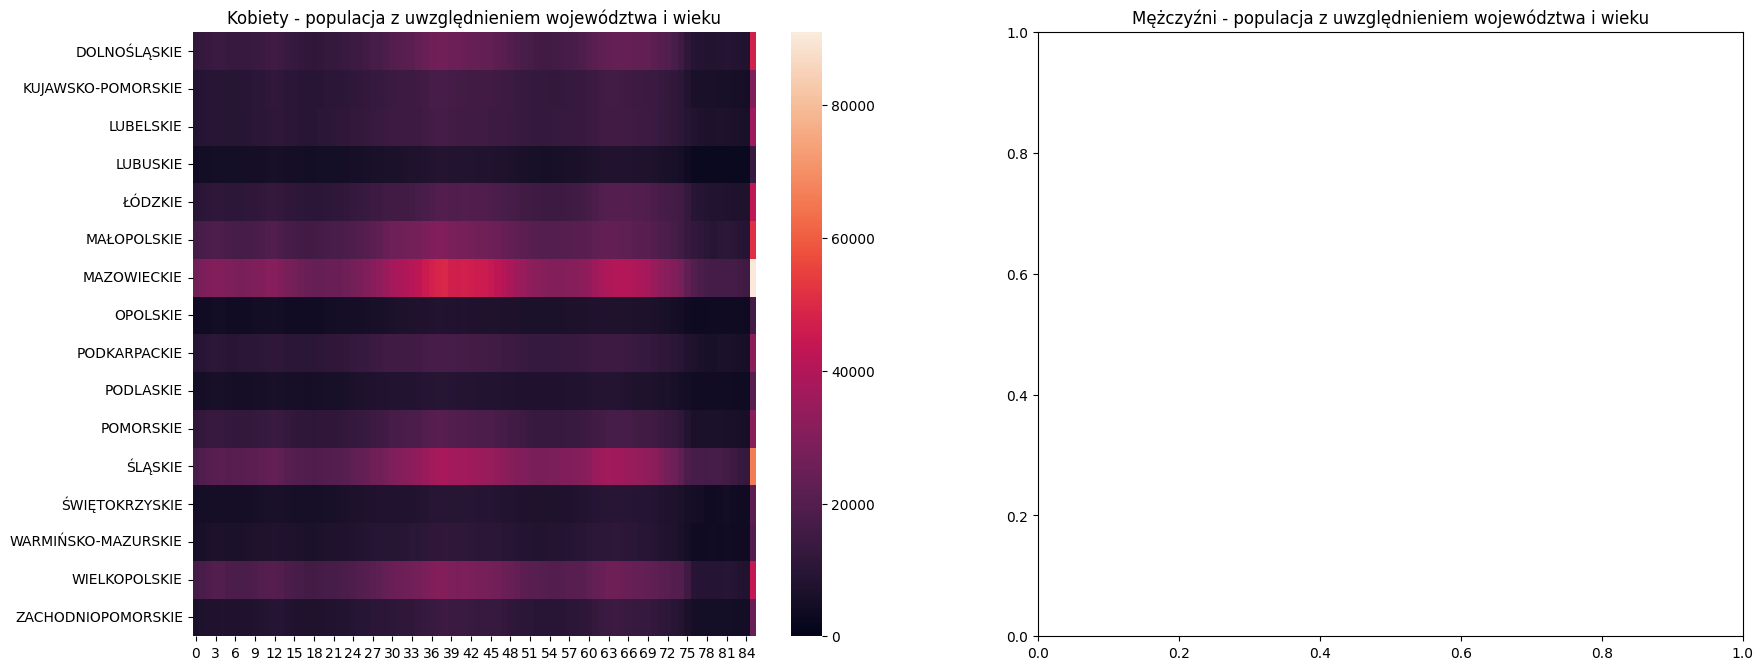

In [6]:
figure, axis = plt.subplots(1, 2)
figure.set_size_inches(20, 8)
figure.set_dpi(100)
sns.heatmap(df_females.transpose().astype('int64'), ax=axis[0], vmin=0, vmax=91000)


axis[0].set_title("Kobiety - populacja z uwzględnieniem województwa i wieku")
axis[1].set_title("Mężczyźni - populacja z uwzględnieniem województwa i wieku")

plt.show()

<AxesSubplot:>

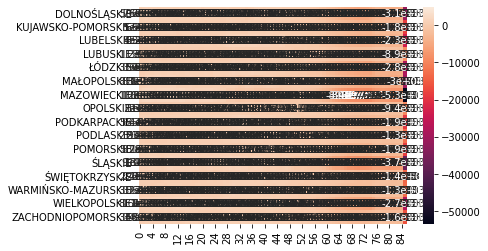

In [7]:
sns.heatmap(df_males.transpose().astype('int64') - df_females.transpose().astype('int64'), vmax=5000, annot=True)

In [8]:
# df_males.to_csv("../app/data/voivodship_males_by_sexage.csv")
# df_females.to_csv("../app/data/voivodship_females_by_sexage.csv")

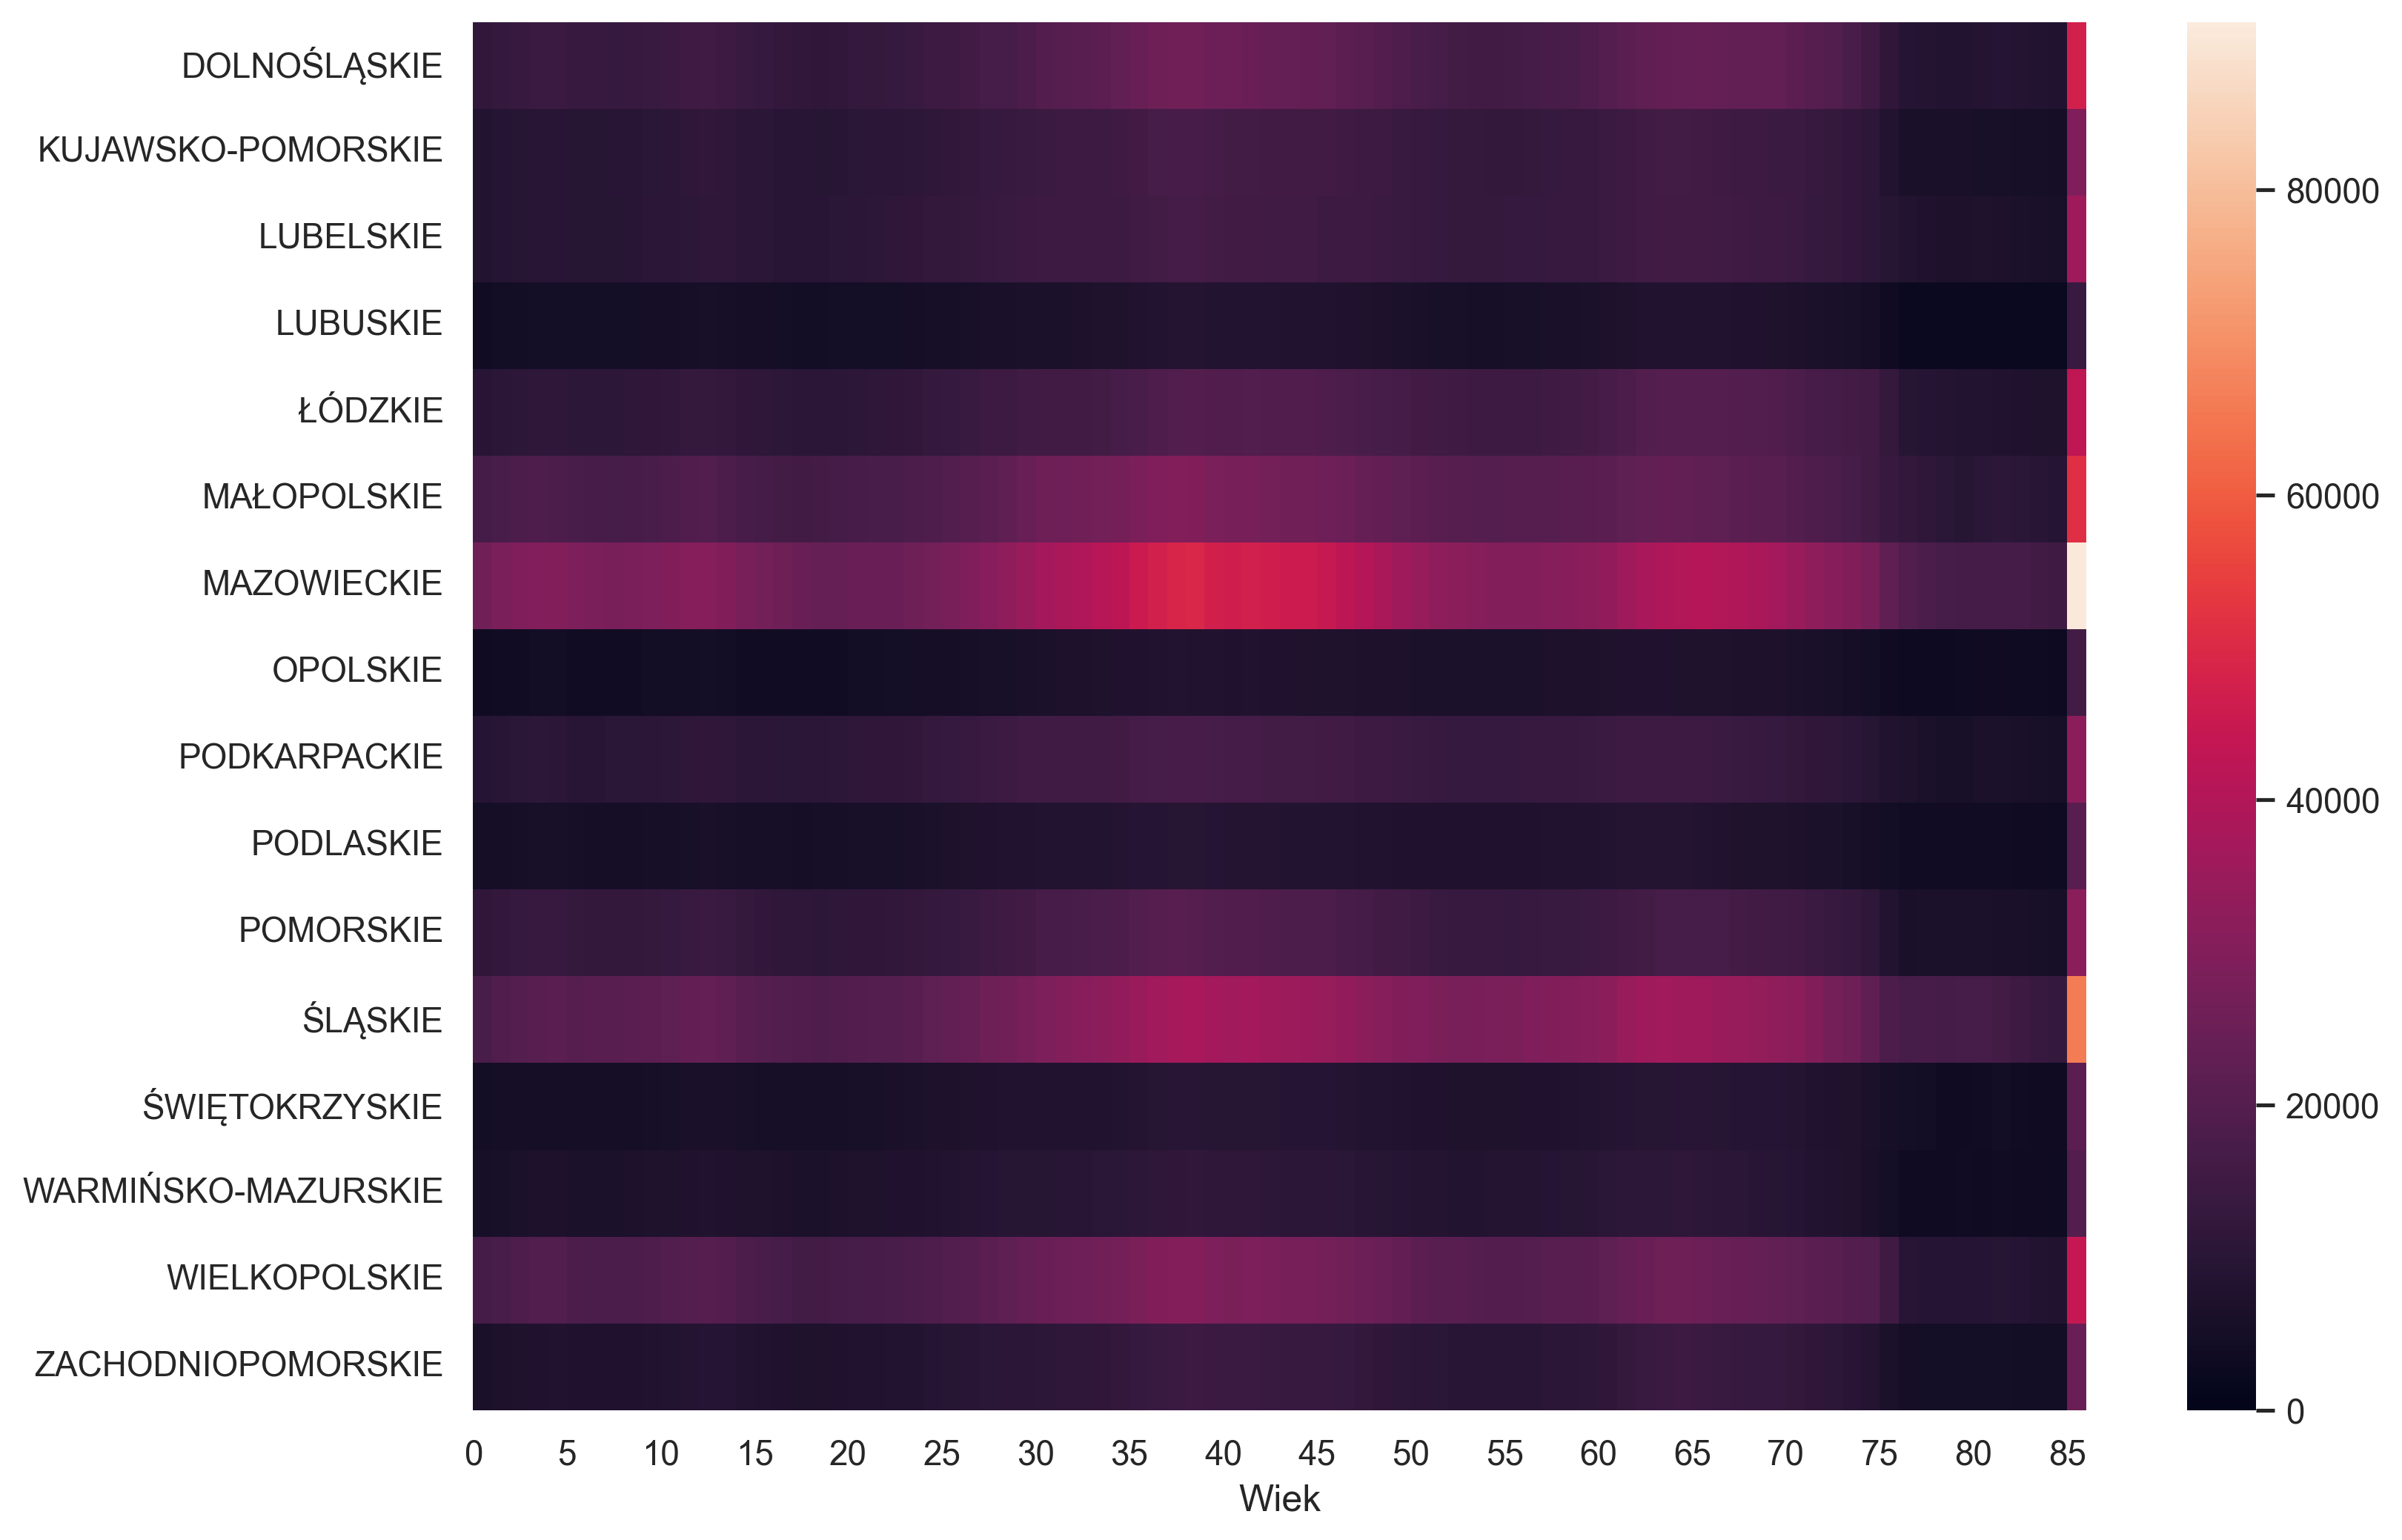

In [18]:
plt.rcParams['figure.dpi'] = 300
sns.set(rc={'figure.figsize':(11.7,8.27)})

g = sns.heatmap(df_females.transpose().astype('int64'), vmin=0, vmax=91000)
plt.xticks([i for i in range(0, 86, 5)], [i for i in range(0, 86, 5)])
plt.xlabel("Wiek")
g.tick_params(axis='x', rotation=0)